# Clients churn forecasting

# Project description and content

In this project we will study the client base of the fitness center and build a model for prognostication of client outflow. We will form the categories of clients, study the specifics of their behavior and suggest ways to retain them. To do this we will:

    - Import libraries for analysis and dataset
    - Check for missing data source
    - Perform EDA analysis using mean review and visualize the data using histograms
    - Check the available data for correlation of features
    - Let's build a model for forecasting customer churn. Models in the project: Logistic Regression and Random Forest Classifier
    - Create a dendogram of clients and determine the optimal number of clusters
    - Divide the clients into 5 clusters according to the task
    - Analyze clusters and define the characteristics of clients
    - Make recommendations for further work with various categories.
    - Let us sum up.


## Import dataset, processing and loading libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import warnings
warnings.filterwarnings('ignore')


In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import tree
from sklearn.model_selection import train_test_split
import pydotplus
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage 

In [3]:
base = pd.read_csv('gym_churn.csv')

base.columns = base.columns.str.lower()
display(base.sample(10))
base.info()
columns = base.columns
display(base[base.duplicated()])

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
914,0,1,0,0,1,1,0,24,149.858635,1.0,3,2.192316,1.255207,1
201,1,1,0,0,1,1,0,25,153.143178,1.0,0,0.342664,0.000000,1
2308,1,1,0,0,1,1,0,21,124.821854,1.0,1,1.681779,1.195885,1
552,0,1,1,1,1,1,1,26,47.883447,1.0,1,1.821792,1.714647,1
983,1,1,0,0,1,1,0,26,195.087219,1.0,14,1.672746,1.519507,0
645,1,1,0,0,1,6,1,28,60.821845,5.0,3,1.356149,1.849020,1
1453,0,1,1,1,1,6,0,34,214.339904,6.0,10,1.179269,1.062388,0
2492,0,1,0,0,1,1,0,27,20.950113,1.0,2,0.523117,0.616272,0
2082,0,0,1,0,1,1,0,24,26.709988,1.0,0,1.709210,1.478773,1
3439,1,1,0,0,1,1,1,25,169.903506,1.0,0,1.626956,0.660728,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   float64
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn


The imported data represents information about 4,000 clients. No skips, no duplicates, we can get to work

## EDA

### Take a look at the dataset: whether there are any missing features, examine the mean values and standard deviations;

In [4]:
base.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
near_location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


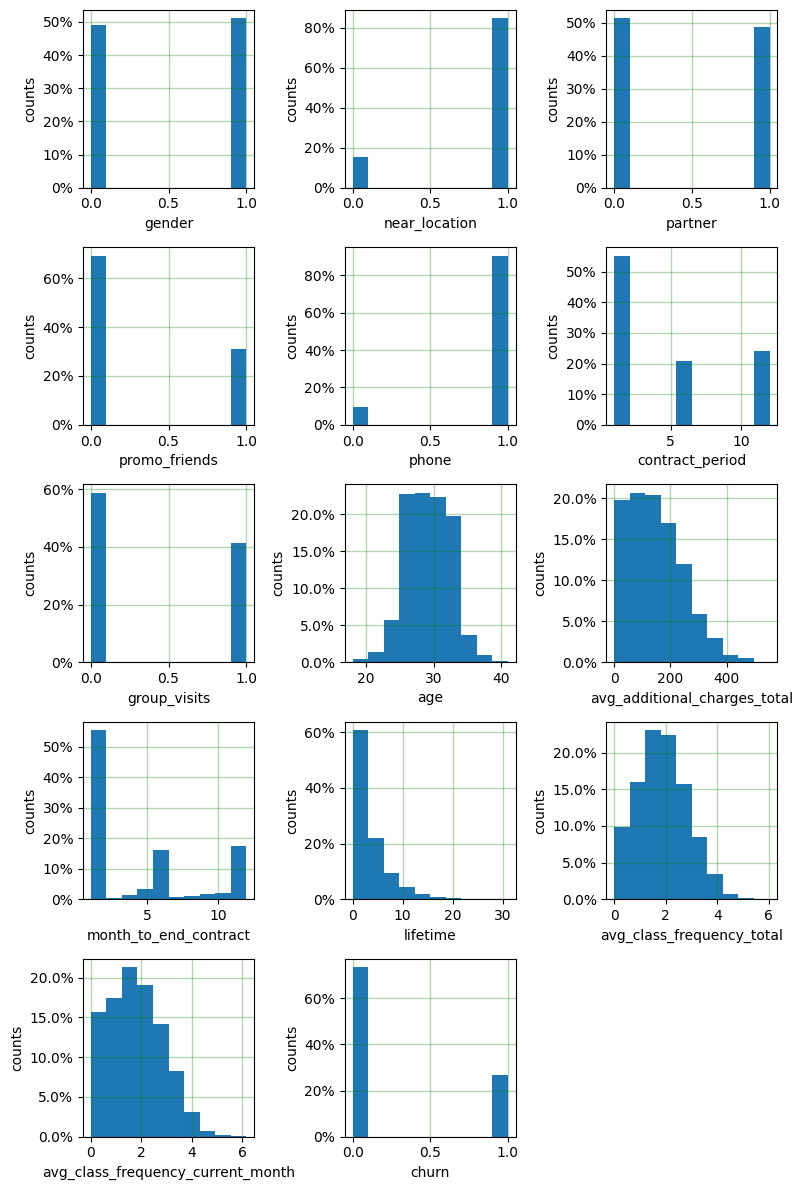

In [5]:
num_plots = len(columns)


fig, axs = plt.subplots(5, 3, figsize=(8, 12))
axs = axs.flatten()


for idx, column in enumerate(columns):
    ax = axs[idx] if num_plots > 1 else axs  # Get the appropriate subplot
    ax.hist(base[column], weights=np.ones(len(base)) / len(base))
    ax.yaxis.set_major_formatter(PercentFormatter(1))
    ax.grid(color='g', linestyle='-', linewidth=1, alpha=0.3)
    ax.set_ylabel('counts')
    ax.set_xlabel(column)

# Hide any empty subplots
for idx in range(num_plots, 15):
    ax = axs[idx] if num_plots > 1 else axs
    ax.axis('off')

plt.tight_layout()

plt.show()

After an initial look at the dataset averages, the following can be determined:
- The gender distribution is about the same 50/50
- Most of the clients are in the vicinity of the fitness club - 85%.
- Half of the club's clients come from affiliate programs.
- 30% came through the progroma: bring a friend
- 90% of the clients left their phone number 
- The average duration of a contract is 4.5 months. More customers sign a monthly subscription - 55%. A 12-month contract is preferred to a 6-month contract by 25% and 20% respectively.
- 40% of the clients take group classes.
- The average age of a customer is 29 years old.
- Average subscription duration 3.7 months
- Average attendance 1.9 classes a week
- Average client spends an extra $147. 
- Average churn is 26% 



### The average values of the criteria in the two groups - those who left  and those who stayed 

In [6]:
base_pivot = base.pivot_table(index='churn', aggfunc='mean')
display(base_pivot)

,age,avg_additional_charges_total,avg_class_frequency_current_month,avg_class_frequency_total,contract_period,gender,group_visits,lifetime,month_to_end_contract,near_location,partner,phone,promo_friends
churn,,,,,,,,,,,,,
0,29.976523,158.445715,2.027882,2.024876,5.747193,0.510037,0.464103,4.711807,5.283089,0.873086,0.534195,0.903709,0.353522
1,26.989632,115.082899,1.044546,1.474995,1.728558,0.510839,0.268615,0.990575,1.662582,0.768143,0.355325,0.902922,0.183789


### Постройте столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток);

In [7]:
base_churn_0 = base.query('churn == 0')
base_churn_1 = base.query('churn == 1')


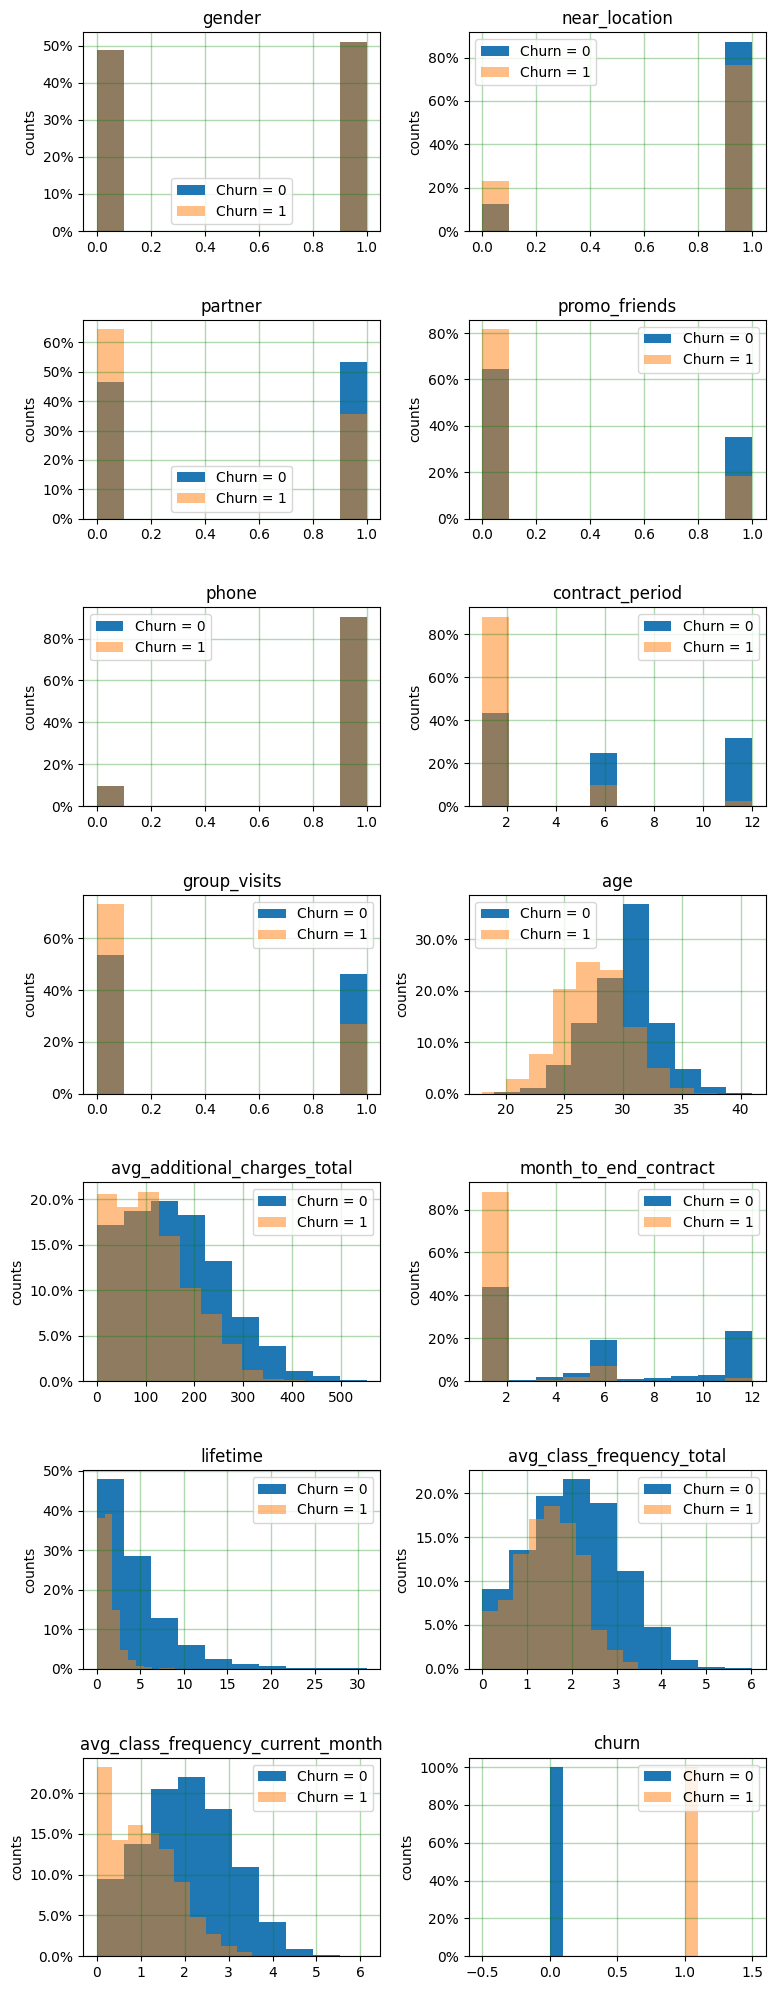

In [8]:
fig, axs = plt.subplots(7, 2, figsize=(8, 20))
axs = axs.flatten()


for idx, column in enumerate(columns):
    ax = axs[idx] if num_plots > 1 else axs  # Get the appropriate subplot
    ax.hist(base_churn_0[column], weights=np.ones(len(base_churn_0)) / len(base_churn_0), label='Churn = 0')
    ax.hist(base_churn_1[column], weights=np.ones(len(base_churn_1)) / len(base_churn_1), alpha=0.5, label='Churn = 1')
    ax.legend(loc='best')
    ax.yaxis.set_major_formatter(PercentFormatter(1))
    ax.grid(color='g', linestyle='-', linewidth=1, alpha=0.3)
    ax.set_ylabel('counts')
    ax.set_title(column)

plt.tight_layout(h_pad=3.08)

plt.show()

### Correlation matrix of features


,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
gender,1.000000,0.006699,-0.010463,-0.005033,-0.008542,0.000502,0.017879,0.013807,-0.009334,-0.001281,0.013579,0.014620,0.009156,0.000708
near_location,0.006699,1.000000,-0.005119,0.210964,-0.015763,0.150233,0.154728,0.058358,0.040761,0.143961,0.070921,0.043127,0.062664,-0.128098
partner,-0.010463,-0.005119,1.000000,0.451960,0.009970,0.306166,0.022710,0.047480,0.022941,0.294632,0.061229,0.024938,0.045561,-0.157986
promo_friends,-0.005033,0.210964,0.451960,1.000000,0.001982,0.244552,0.120170,0.050113,0.036898,0.239553,0.072721,0.028063,0.053768,-0.162233
phone,-0.008542,-0.015763,0.009970,0.001982,1.000000,-0.006893,-0.010099,-0.011403,0.009279,-0.011196,-0.018801,0.008340,0.013375,-0.001177
contract_period,0.000502,0.150233,0.306166,0.244552,-0.006893,1.000000,0.169991,0.138249,0.111445,0.973064,0.170725,0.096211,0.159407,-0.389984
group_visits,0.017879,0.154728,0.022710,0.120170,-0.010099,0.169991,1.000000,0.080934,0.032079,0.163703,0.075853,0.056695,0.075923,-0.175325
age,0.013807,0.058358,0.047480,0.050113,-0.011403,0.138249,0.080934,1.000000,0.080240,0.134511,0.164693,0.119953,0.183095,-0.404735
avg_additional_charges_total,-0.009334,0.040761,0.022941,0.036898,0.009279,0.111445,0.032079,0.080240,1.000000,0.113958,0.079028,0.044426,0.079570,-0.198697
month_to_end_contract,-0.001281,0.143961,0.294632,0.239553,-0.011196,0.973064,0.163703,0.134511,0.113958,1.000000,0.161078,0.085387,0.147605,-0.381393


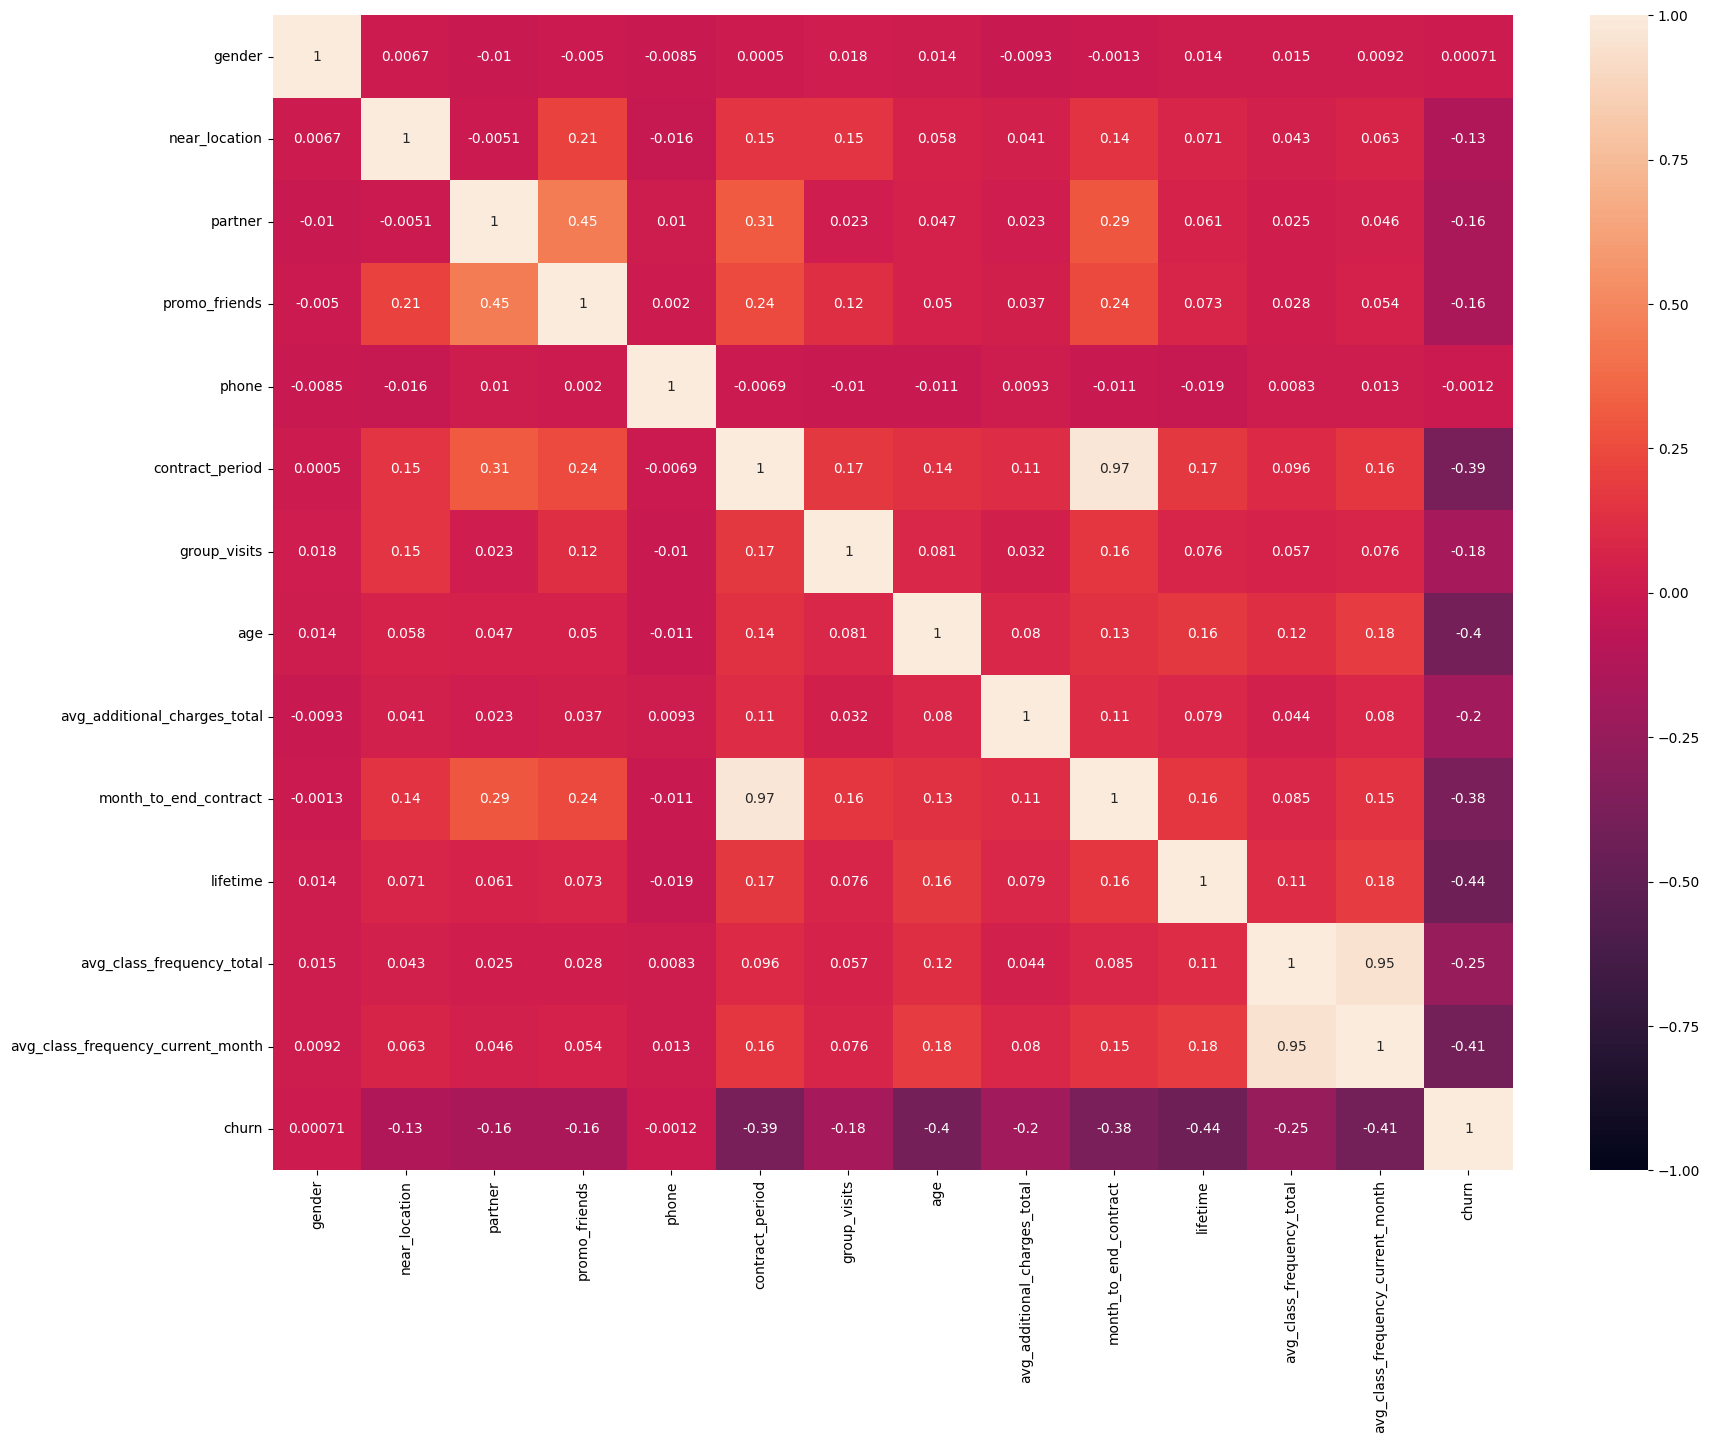

In [9]:
corr = base.corr()
display(corr)
plt.subplots(figsize=(20,15))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1)
sns.color_palette("rocket_r")
plt.show()

The correlation matrix generally does not contain strongly pronounced pairwise correlated parameters. 

High correlations are shown by the parameters: Average number of visits per week for the whole period and for the last month; the contract period and the number of months until the end of the contract. Both parameters are related in their meaning. 

## Model for predicting customer churn

### Binary client classification model, where the target attribute is the fact of client churn in the next month:

#### Logistic Regression

In [19]:
base_filtred = base.drop(columns=['month_to_end_contract', 'phone'])
X = base_filtred.drop(columns=['churn'])
y = base_filtred['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2, stratify=y)


#models = [LogisticRegression(),RandomForestRegressor()]


model_logreg = LogisticRegression()
model_logreg.fit(X_train, y_train)
y_pred_logreg = model_logreg.predict(X_test)

acc_logreg = accuracy_score(y_test, y_pred_logreg) 
precision_logreg = precision_score (y_test, y_pred_logreg)
recall_logreg = recall_score (y_test, y_pred_logreg) 

def mape(y_true, y_pred):
    y_error = y_true - y_pred
    y_error_abs = [abs(i) for i in y_error]
    perc_error_abs = y_error_abs / y_true
    return perc_error_abs.sum() / len(y_true)



#### Random Forest

In [20]:
model_randforest = RandomForestClassifier()
model_randforest.fit(X_train, y_train)
y_pred_model_randforest = model_randforest.predict(X_test)

acc_model_randforest = accuracy_score(y_test, y_pred_model_randforest) 
precision_model_randforest = precision_score (y_test, y_pred_model_randforest)
recall_model_randforest = recall_score (y_test, y_pred_model_randforest) 





In [21]:
tree_estimator = model_randforest.estimators_[0]


dot_data = tree.export_graphviz(tree_estimator, out_file=None, 
                                feature_names=X.columns,  
                                class_names= 'churn',  
                                filled=True, rounded=True,  
                                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png("decision_tree.png")  

True

In [22]:
print('Logistic Regression : Accuracy: {:.2f} Precision: {:.2f} Recall: {:.2f} MAE:{:.2f} MSE:{:.2f} MAPE:{:.2f} R2:{:.2f} '.format(
            acc_logreg,
            precision_logreg,
            recall_logreg,
            mean_absolute_error(y_test, y_pred_logreg),
            mean_squared_error(y_test, y_pred_logreg),
            mape(y_test, y_pred_logreg),
            r2_score(y_test, y_pred_model_randforest),
        ))

print('Random Forest       : Accuracy: {:.2f} Precision: {:.2f} Recall: {:.2f} MAE:{:.2f} MSE:{:.2f} MAPE:{:.2f} R2:{:.2f} '.format(
            acc_model_randforest,
            precision_model_randforest,
            recall_model_randforest,
            mean_absolute_error(y_test, y_pred_model_randforest),
            mean_squared_error(y_test, y_pred_model_randforest),
            mape(y_test, y_pred_model_randforest),
            r2_score(y_test, y_pred_model_randforest),
        ))

Logistic Regression : Accuracy: 0.92 Precision: 0.88 Recall: 0.79 MAE:0.08 MSE:0.08 MAPE:inf R2:0.61 
Random Forest       : Accuracy: 0.92 Precision: 0.88 Recall: 0.83 MAE:0.08 MSE:0.08 MAPE:inf R2:0.61 


In [23]:
weights = model_logreg.coef_[0]
fi_df = pd.DataFrame(
    data={'feature': X.columns, 'importance': weights}
)
display(fi_df)




,feature,importance
0,gender,-0.040123
1,near_location,0.791352
2,partner,0.174654
3,promo_friends,-0.628079
4,contract_period,-0.258293
5,group_visits,-0.738530
6,age,-0.049194
7,avg_additional_charges_total,-0.003924
8,lifetime,-0.910374
9,avg_class_frequency_total,4.230280


In this block we created 2 models for predicting customer churn Random Forest Classifier and Logisttic Regression. Both models showed high prediction accuracy over 90%. Random Forest turned out to be the most accurate of the two models. The target hit rate is 93%. The level of relevant hits is 88%, Recall is 84%. 

In this situation, as the fight is for customers who silently leave the fitness center Percision value is in priority. It is more important for us to know exactly whether the client stayed with us or not, rather than double-check those who are already in attendance. Again, 88% is a decent result for a model.

 I don't like the importance of having a phone. I don't think it's really a determining factor in real life. Although the fact that the client left his phone number, something about his intentions for a long-term visit. Also I dropped month_to_end_contract bcs of the high correlation with contract period


## Client clustering

### Finding the optimal number of clusters

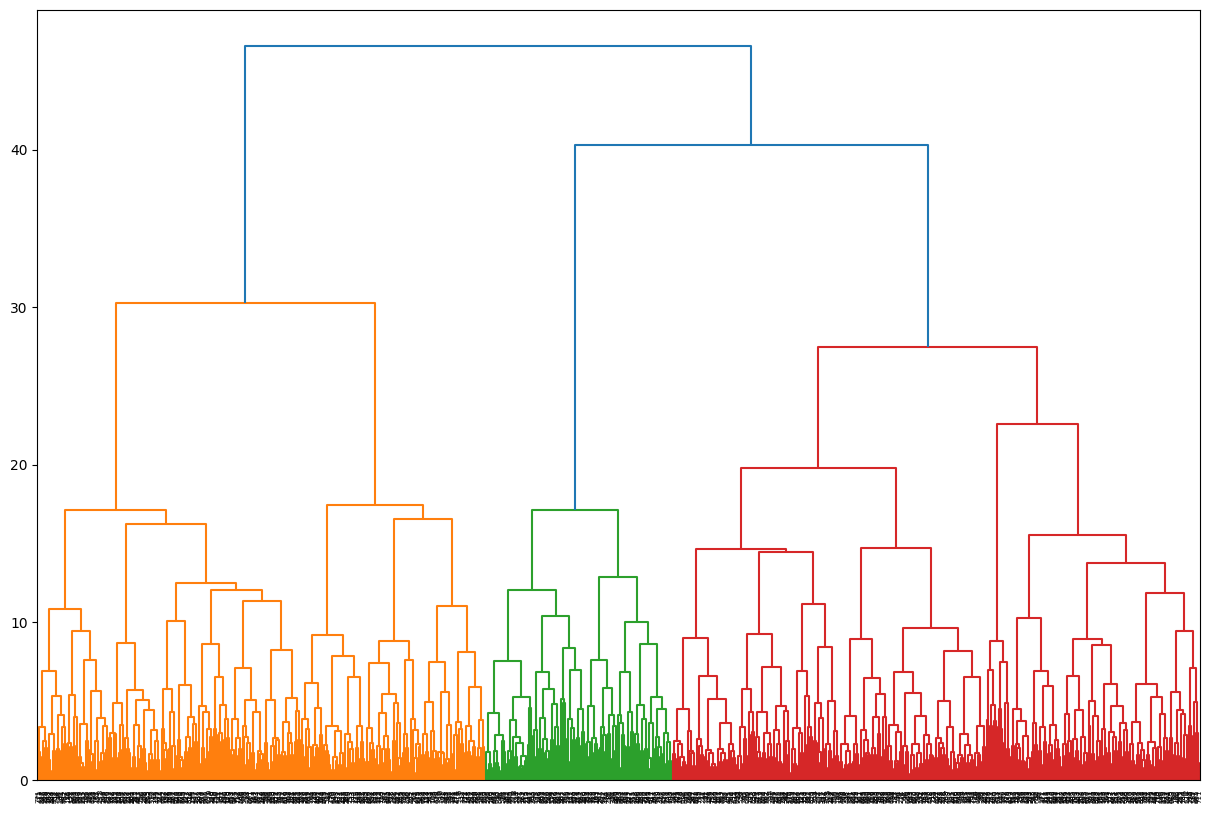

In [24]:
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)

X_test_st = scaler.transform(X_test)

linked = linkage(X_test_st, method = 'ward')

plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.show() 

According to this dendogram I would distinguish 5 clusters. 2 large clusters of red + green + 2 orange.

### Number of clusters at n=5

In [25]:
x_sc = scaler.fit_transform(base)

km = KMeans(n_clusters = 5, random_state = 0)
labels = km.fit_predict(x_sc)

base['cluster_km'] = labels

cluster_pivot = base.pivot_table(index='cluster_km', aggfunc='mean').reset_index()
display(cluster_pivot)
display(base[['gender','cluster_km']].groupby(by='cluster_km').agg('count'))


,cluster_km,age,avg_additional_charges_total,avg_class_frequency_current_month,avg_class_frequency_total,churn,contract_period,gender,group_visits,lifetime,month_to_end_contract,near_location,partner,phone,promo_friends
0,0,28.522059,132.741216,1.515890,1.706629,0.450368,2.069853,0.503676,0.211397,2.757353,1.950368,0.000000,0.459559,0.917279,0.075368
1,1,29.962190,161.853561,2.786919,2.788103,0.007823,10.447197,0.492829,0.516297,4.833116,9.477184,0.936115,0.764016,0.919166,0.534550
2,2,26.926918,113.173051,1.037592,1.449720,0.961023,1.546894,0.507917,0.287454,1.031669,1.500609,1.000000,0.323995,0.903776,0.213155
3,3,30.237288,157.988625,2.207359,2.203432,0.003390,1.882203,0.521186,0.452542,4.923729,1.794915,0.996610,0.282203,0.904237,0.208475
4,4,29.728198,162.907495,0.943967,0.957744,0.024709,8.859012,0.518895,0.534884,4.411337,8.155523,0.968023,0.744186,0.873547,0.526163


,gender
cluster_km,
0,544
1,767
2,821
3,1180
4,688


,cluster_km,gender
0,0,0.503676
1,1,0.492829
2,2,0.507917
3,3,0.521186
4,4,0.518895


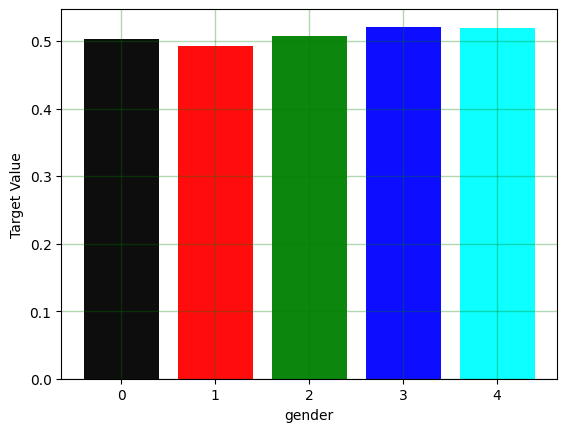

,cluster_km,near_location
0,0,0.000000
1,1,0.936115
2,2,1.000000
3,3,0.996610
4,4,0.968023


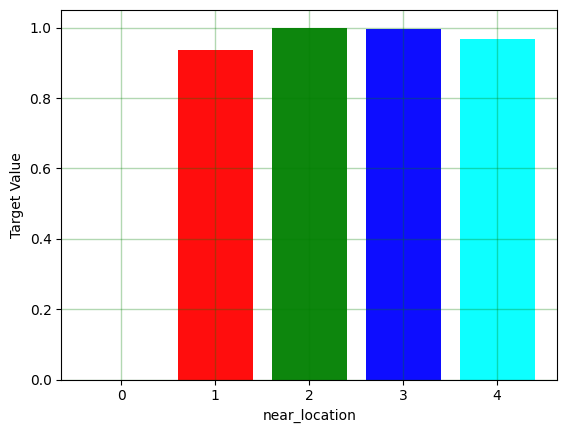

,cluster_km,partner
0,0,0.459559
1,1,0.764016
2,2,0.323995
3,3,0.282203
4,4,0.744186


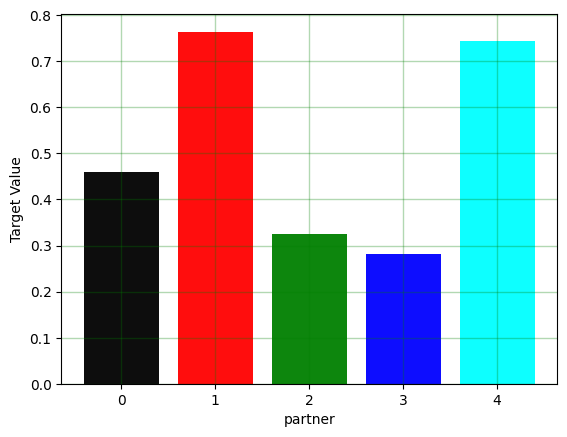

,cluster_km,promo_friends
0,0,0.075368
1,1,0.534550
2,2,0.213155
3,3,0.208475
4,4,0.526163


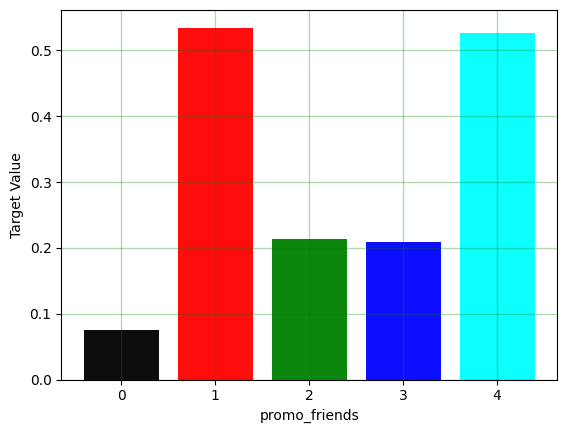

,cluster_km,phone
0,0,0.917279
1,1,0.919166
2,2,0.903776
3,3,0.904237
4,4,0.873547


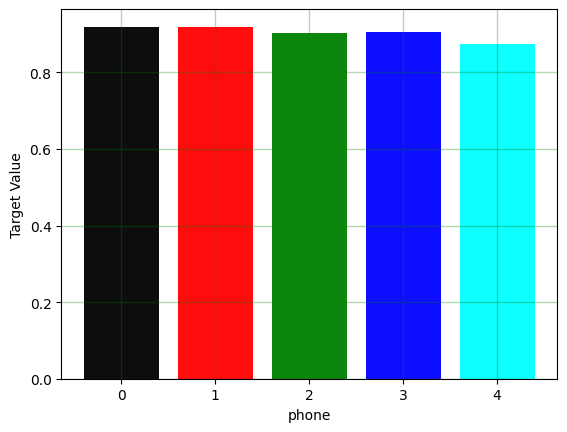

,cluster_km,contract_period
0,0,2.069853
1,1,10.447197
2,2,1.546894
3,3,1.882203
4,4,8.859012


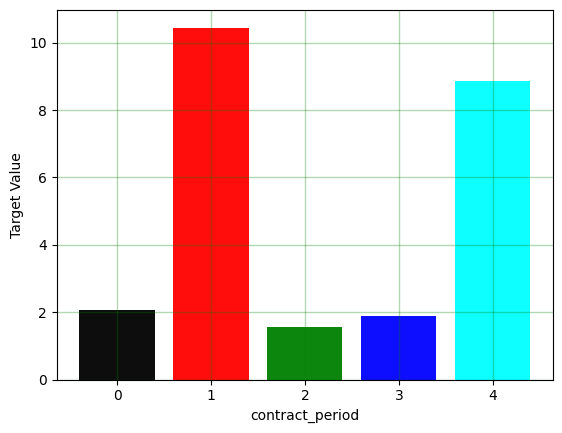

,cluster_km,group_visits
0,0,0.211397
1,1,0.516297
2,2,0.287454
3,3,0.452542
4,4,0.534884


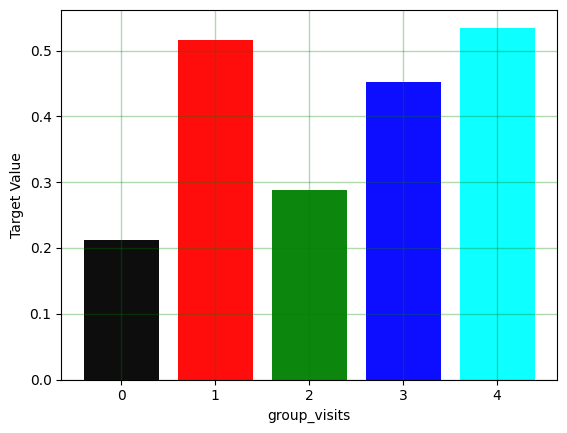

,cluster_km,age
0,0,28.522059
1,1,29.962190
2,2,26.926918
3,3,30.237288
4,4,29.728198


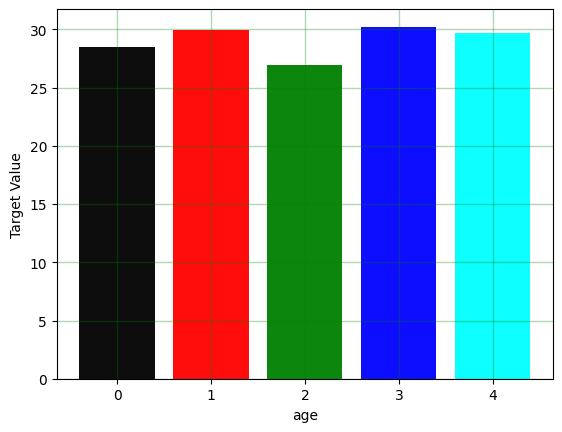

,cluster_km,avg_additional_charges_total
0,0,132.741216
1,1,161.853561
2,2,113.173051
3,3,157.988625
4,4,162.907495


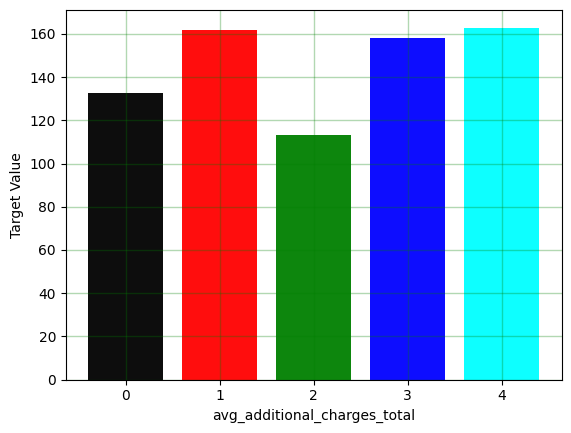

,cluster_km,month_to_end_contract
0,0,1.950368
1,1,9.477184
2,2,1.500609
3,3,1.794915
4,4,8.155523


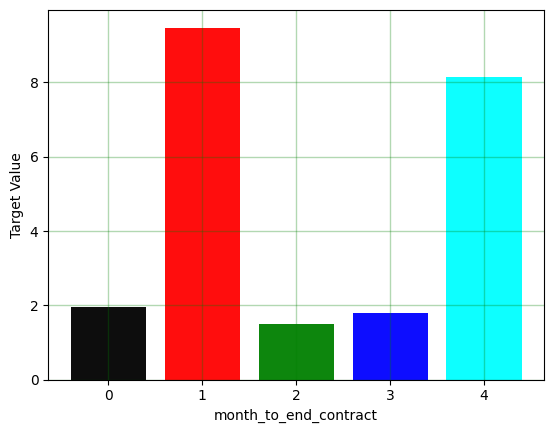

,cluster_km,lifetime
0,0,2.757353
1,1,4.833116
2,2,1.031669
3,3,4.923729
4,4,4.411337


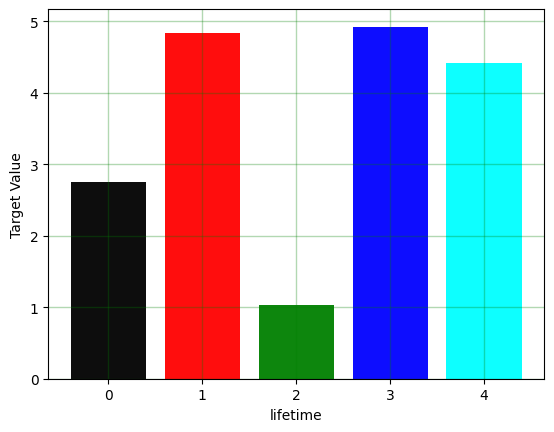

,cluster_km,avg_class_frequency_total
0,0,1.706629
1,1,2.788103
2,2,1.449720
3,3,2.203432
4,4,0.957744


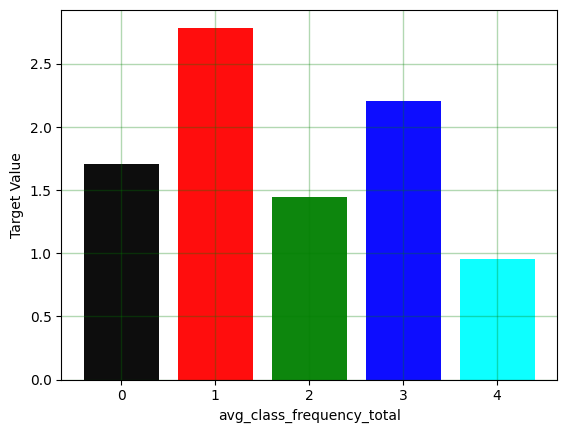

,cluster_km,avg_class_frequency_current_month
0,0,1.515890
1,1,2.786919
2,2,1.037592
3,3,2.207359
4,4,0.943967


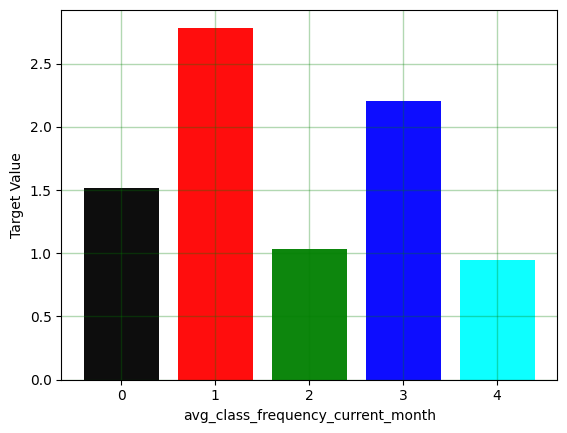

,cluster_km,churn
0,0,0.450368
1,1,0.007823
2,2,0.961023
3,3,0.003390
4,4,0.024709


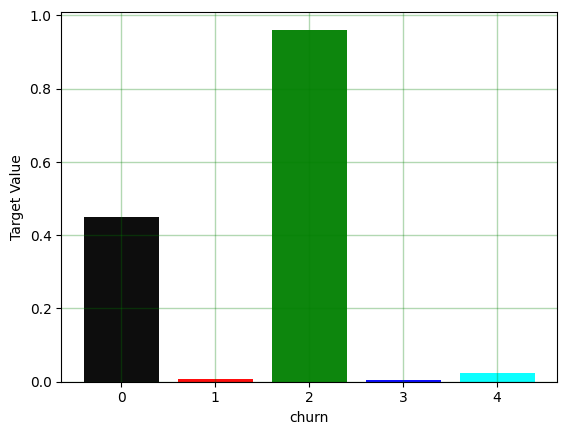

In [26]:
for i in columns:
    display(cluster_pivot[['cluster_km',i]])
    plt.bar(cluster_pivot.index, cluster_pivot[i], color=['black', 'red', 'green', 'blue', 'cyan'], alpha = 0.95)
    plt.grid(color='g', linestyle='-', linewidth=1, alpha=0.3)
    plt.ylabel('Target Value')
    plt.xlabel(i)
    plt.show()

Clustering showed that 3 types of customers do not tend to fall off. Customer churn of one type is 96+% let's call it <b> Cluster A </b> , another cluster with churn of customers 45+% let's call it <b> Cluster B </b> Let's focus on these two types and propose retention techniques

Overview of cluster 1:

Average age below typical customer - 27 years old
Spend less on additional services 
Don't visit the gym intensively - 1 session per week
Take shorter contracts
Live in the neighborhood 
Not a member of any affiliate group
Don't take group classes 

Overview of the 2nd cluster:
Average age is similar to the average for the club as a whole 
Uses complementary services less than others 
Attendance is slightly below the ward average
Contracts short term  
Reside farther from the center than other clients
Do not take friends with them




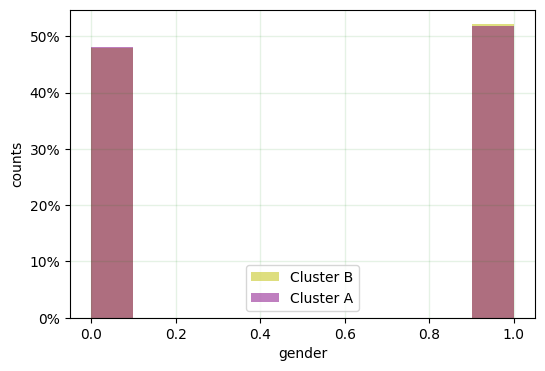

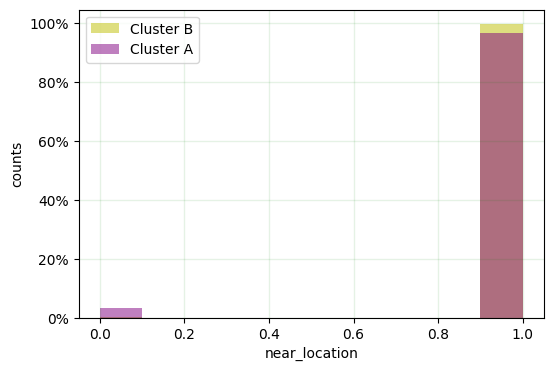

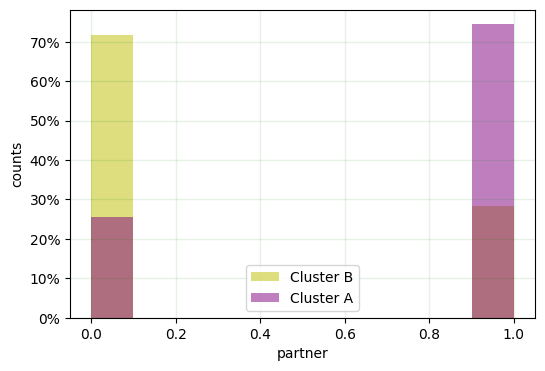

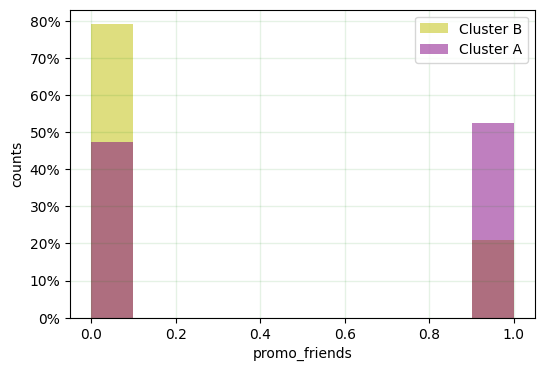

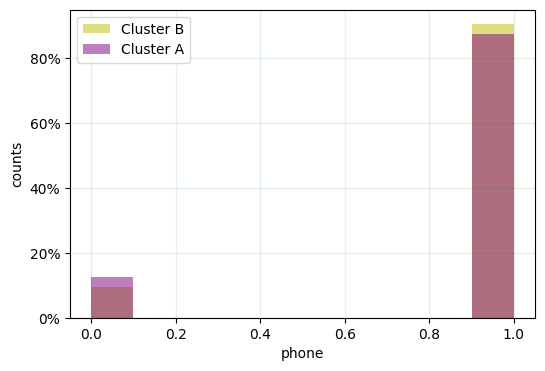

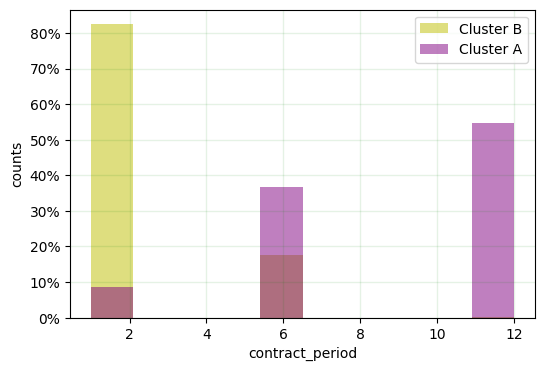

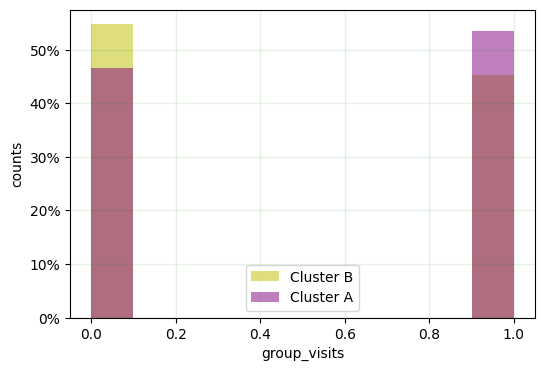

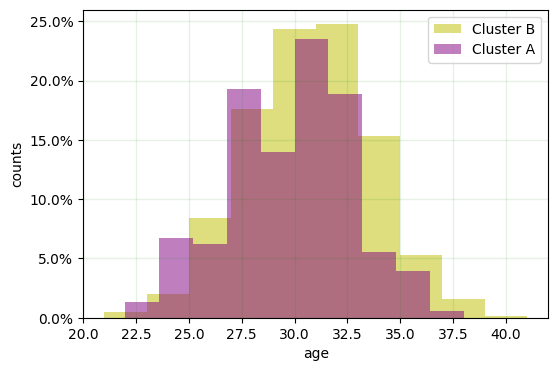

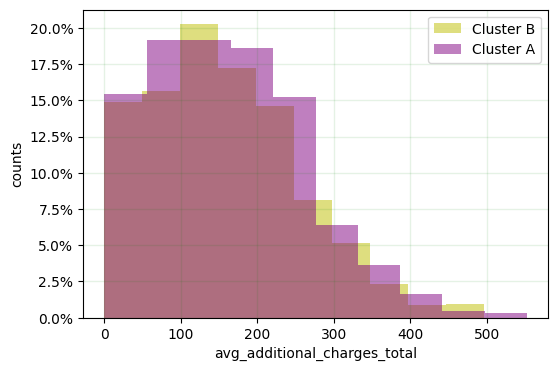

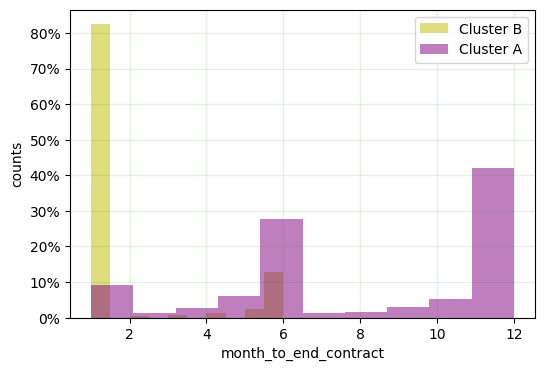

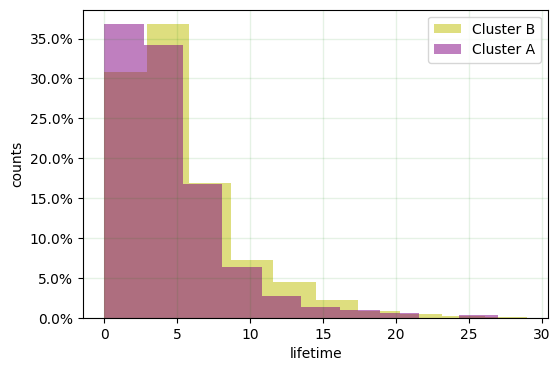

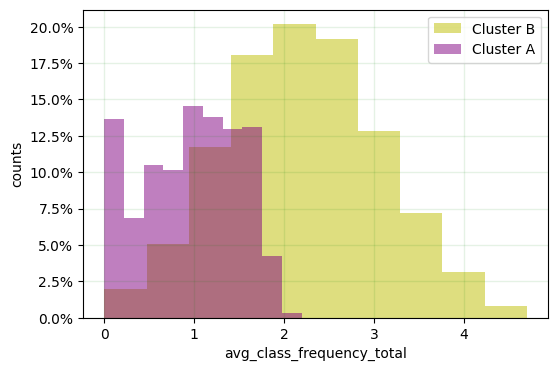

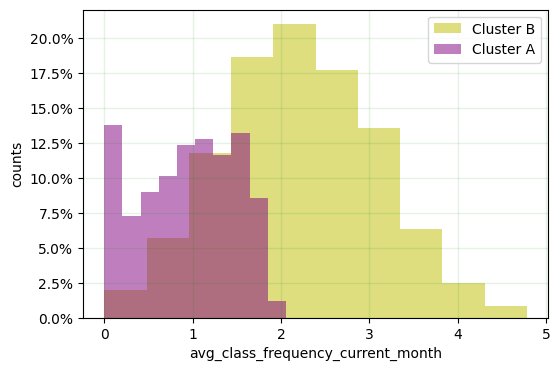

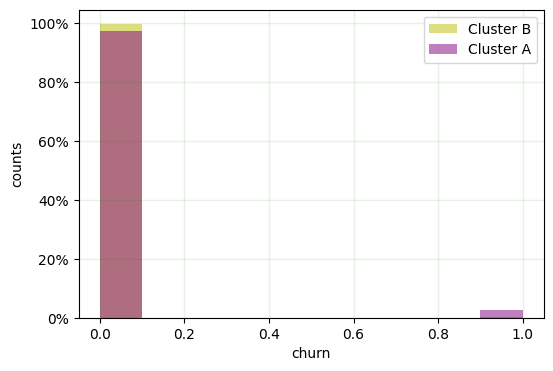

In [30]:
#cluster_0 = base.query('cluster_km == 0')
#cluster_1 = base.query('cluster_km == 1')
#cluster_2 = base.query('cluster_km == 2')
cluster_3 = base.query('cluster_km == 3')
cluster_4 = base.query('cluster_km == 4')


for i in columns:
    plt.figure(figsize=(6, 4))
#    plt.hist(cluster_0[i], weights=np.ones(len(cluster_0)) / len(cluster_0), stacked=False, alpha=0.7, color='b', label='Cluster = 0')
#    plt.hist(cluster_1[i], weights=np.ones(len(cluster_1)) / len(cluster_1), stacked=False, alpha=0.7, color='r', label='Cluster = 1')
#    plt.hist(cluster_2[i], weights=np.ones(len(cluster_2)) / len(cluster_2), stacked=False, alpha=0.7, color='g', label='Cluster = 2')
    plt.hist(cluster_3[i], weights=np.ones(len(cluster_3)) / len(cluster_3), stacked=False, alpha=0.5, color='y', label='Cluster B')
    plt.hist(cluster_4[i], weights=np.ones(len(cluster_4)) / len(cluster_4), stacked=False, alpha=0.5, color='purple', label='Cluster A')
    plt.legend(loc='best')
    plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
    plt.grid(color='g', linestyle='-', linewidth=1, alpha=0.1)
    plt.ylabel('counts')
    plt.xlabel(i)
    plt.show()

# Conclusions and recommendations

In our work we analyzed 4 thousand clients of the fitness center. We looked at different indicators of the clients who left our center and those who continue to use the services.

In the process of clustering revealed two types of customers on the retention of which I would advise to focus. Cluster A and B.

To retain cluster A I would advise to use age discounts. As the histogram shows, these are young customers who do not buy long term subscriptions. Maybe a discount for 6 and 12 months for those under 25 could be an incentive to continue to use our center.

Also this cluster tends not to use group classes. Perhaps if we manage to offer this service more actively, there will be a social component to going to the gym and it will help retain guests.

For cluster B, I would suggest offering discounts on additional services and participation in group sections. You can see that they live farther away than others and need to come up with triggers that would keep them coming despite the distance. Active participation in group activities can raise social activity and increase the likelihood of coming back to the club.

That's it)
